In [1]:
import numpy as np
import cvxopt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [2]:
del_t = 0.1
v_init = 0.1
w_init = 0

class agent:
    def __init__(self,rad,start,goal,theta,vmax,wmax):
        self.rad = rad
        self.xpath = []
        self.ypath = []
        self.vplot = []
        self.wplot = []
        self.time = 0
        self.goal = goal
        self.theta = theta
        self.v = v_init
        self.w = w_init
        self.pos = start
        self.vmax = vmax
        self.wmax = wmax
        self.optfl = 0
    def __str__(self):
        return (str(self.time)+" "+str(self.theta)+" "+str(self.v)+" "+str(self.w)+" "+str(self.pos))
    def opt_traj(self):
        self.visualize_traj()
        cost_hist = []
        cost_hist.append(0)
        it = 0
        while (np.linalg.norm(self.pos-self.goal)>0.5):
#             self.visualize_traj()
            if (self.optfl==0):
                theta_new = self.theta + self.w*del_t
                xgi = self.pos[0] + self.v*del_t*np.cos(theta_new) - self.goal[0]
                ygi = self.pos[1] + self.v*del_t*np.sin(theta_new) - self.goal[1]
                p_mat = 2*np.array([[del_t**2,0],
                                  [0,(self.v**2)*(del_t**4)]])
                P = cvxopt.matrix(p_mat,tc='d')
                q_mat = np.array([2*del_t*(xgi*np.cos(theta_new)+ygi*np.sin(theta_new)),
                                 -2*del_t**2*self.v*(xgi*np.sin(theta_new)-ygi*np.cos(theta_new))])
    #             print (p_mat,q_mat)
                Q = cvxopt.matrix(q_mat,tc='d')
                g_mat = np.array([[1,0],[0,1],[0,-1]])
                h = cvxopt.matrix(np.array([self.vmax-self.v,self.wmax-self.w,self.wmax-self.w]),tc='d')
                g = cvxopt.matrix(g_mat,tc='d')
                sol = cvxopt.solvers.qp(P,Q,g,h,options={'show_progress': False})
                v_new = sol['x'][0]
                w_new = sol['x'][1]
                print ("v_new: ",v_new,"w_new: ",w_new)
                it+=1
                x_new = self.pos[0] + (self.v+v_new)*del_t*np.cos(self.theta+(self.w+w_new)*del_t)
                y_new = self.pos[1] + (self.v+v_new)*del_t*np.sin(self.theta+(self.w+w_new)*del_t)
                cost = np.linalg.norm(np.array([x_new,y_new])- self.goal)**2
                prev_cost = cost_hist[-1]
                print (it,cost)
                if (np.linalg.norm(np.array([v_new,w_new]))>0.1):
                    self.v += v_new 
                    self.w += w_new
                    self.vplot.append(self.v)
                    self.wplot.append(self.w)
                    print ("sending to optimiser: ",self.v,self.w)
                    cost_hist.append(cost)
                else:
                    self.optfl = 1
                    self.v += v_new 
                    self.w += w_new
                    print ("final v and w: ",self.v,self.w)
            else:
                self.vplot.append(self.v)
                self.wplot.append(self.w)
                x_new = self.pos[0] + self.v*del_t*np.cos(self.theta+self.w*del_t)
                y_new = self.pos[1] + self.v*del_t*np.sin(self.theta+self.w*del_t)
                self.theta = self.theta+self.w*del_t
                self.xpath.append(x_new)
                self.ypath.append(y_new)
                self.pos = [x_new,y_new]
                print (self)
                self.time+=1
                self.visualize_traj()
                
             
    def visualize_traj(self):
        figure = plt.figure()
#         print (self.pos)
        print ("I wanna rotate by: ",self.theta)
        ax = figure.add_subplot(1,1,1)
        robot = matplotlib.patches.Rectangle(
            (self.pos[0]-self.rad*np.sqrt(2)*np.cos(self.theta+np.pi/4),self.pos[1]-self.rad*np.sqrt(2)*np.sin(self.theta+np.pi/4)),
            height = self.rad*2,
            width = self.rad*2,
            angle = self.theta*180/np.pi,
            edgecolor='black',
            linewidth=1.0,
            animated=True,
            alpha=1,
            zorder=2)
        ax.add_patch(robot)
        name = 'data/snap%s.png'%str(self.time)
        ax.plot([self.goal[0]], [self.goal[1]], '*', color="red", markersize =15,linewidth=3.0)
        ax.plot(self.xpath,self.ypath,'b-')
        ax.set_aspect('equal')
        ax.set_xlim(-10.0, 60.0)
        ax.set_ylim(-10.0, 60.0)
        ax.set_xlabel(r'$x (m)$')
        ax.set_ylabel(r'$y (m)$')
        ax.grid(True)
        plt.savefig(name, dpi = 200)
        plt.cla()
        plt.close(figure)
        return figure
    


I wanna rotate by:  0
v_new:  9.89999985815503 w_new:  5.999995387867064
1 4862.002205136303
sending to optimiser:  9.99999985815503 5.999995387867064
v_new:  1.4186817492527497e-07 w_new:  4.611732779502218e-06
2 4862.002191170254
final v and w:  10.000000000023205 5.999999999599844
0 0.5999999999599844 10.000000000023205 5.999999999599844 [0.825335614934188, 0.5646424733633194]
I wanna rotate by:  0.5999999999599844
1 1.1999999999199689 10.000000000023205 5.999999999599844 [1.1876933694862948, 1.4966815593037088]
I wanna rotate by:  1.1999999999199689
2 1.7999999998799532 10.000000000023205 5.999999999599844 [0.9604912749095877, 2.4705291902114386]
I wanna rotate by:  1.7999999998799532
3 2.3999999998399377 10.000000000023205 5.999999999599844 [0.2230975594747472, 3.145992370882186]
I wanna rotate by:  2.3999999998399377
4 2.9999999997999223 10.000000000023205 5.999999999599844 [-0.7668949370997606, 3.287112379140456]
I wanna rotate by:  2.9999999997999223
5 3.599999999759907 10.0000

58 35.39999999763905 10.000000000023205 5.999999999599844 [-2.0390938595761092, 2.3190894128536845]
I wanna rotate by:  35.39999999763905
59 35.99999999759903 10.000000000023205 5.999999999599844 [-2.1670575515850388, 1.327310559715504]
I wanna rotate by:  35.99999999759903
60 36.59999999755902 10.000000000023205 5.999999999599844 [-1.712670079354154, 0.43650641452742256]
I wanna rotate by:  36.59999999755902
61 37.199999997519 10.000000000023205 5.999999999599844 [-0.8346620597228278, -0.042139506240442826]
I wanna rotate by:  37.199999997519
62 37.799999997478984 10.000000000023205 5.999999999599844 [0.16025304564206377, 0.0585775882440978]
I wanna rotate by:  37.799999997478984
63 38.39999999743897 10.000000000023205 5.999999999599844 [0.9245227665942178, 0.7034743192331436]
I wanna rotate by:  38.39999999743897
64 38.99999999739895 10.000000000023205 5.999999999599844 [1.1911657014616521, 1.6672697048259169]
I wanna rotate by:  38.99999999739895
65 39.599999997358935 10.00000000002

KeyboardInterrupt: 

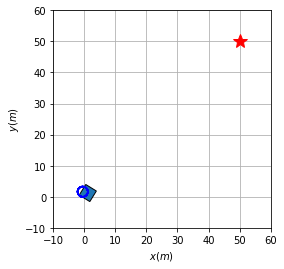

In [3]:
bot = agent(2,np.array([0,0]),np.array([50,50]),0,10,6)
bot.opt_traj()

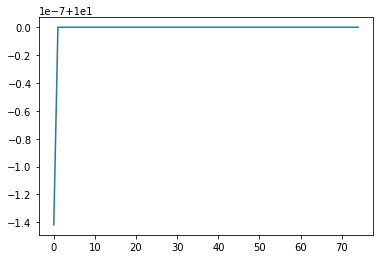

In [16]:
plt.plot(bot.vplot)

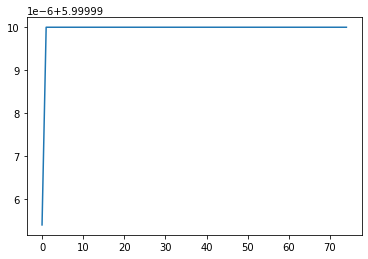

In [17]:
plt.plot(bot.wplot)